##**Machine Learning🖥**
---
#**K-Nearest Neighbor (KNN)**
**𝑩𝒀 ⟹ 𝑷𝑹𝑰𝑵𝑪𝑬 💗**

---


####**Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Importing Some Important Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Notes/Iris.csv')
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
# Checking Missing Values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Describe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###**Visual Analysis**
**To analysis we don't need of 'Id', so we'll delete it.**


In [27]:
# Visual Analysis
# To analysis we don't need of 'Id', so we'll delete it.
df.drop('Id', axis = 1, inplace = True)

SepalLengthCm has mean = 3.054 and median = 3.000 almost same(equal), So it has **Normalized Bell Curve**.

***Normalized Bell Curve → Equally Distributed Data → Skewness closer to Zero***

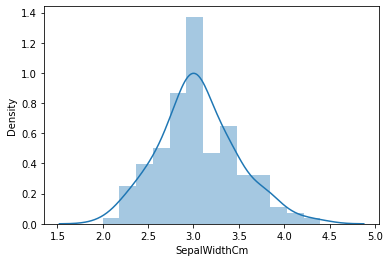

In [28]:
sns.distplot(df['SepalWidthCm'])

In [29]:
# Skewness
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [13]:
# Skewness is positive and close to Zero

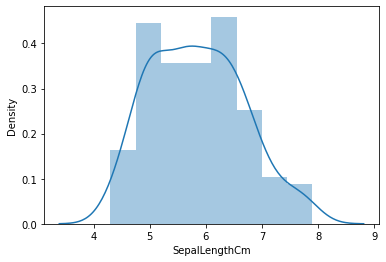

In [30]:
sns.distplot(df['SepalLengthCm'])

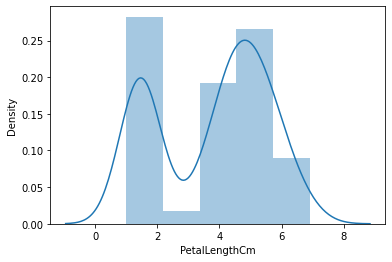

In [32]:
# PetalLengthCm has very poor data distribution
sns.distplot(df['PetalLengthCm'])

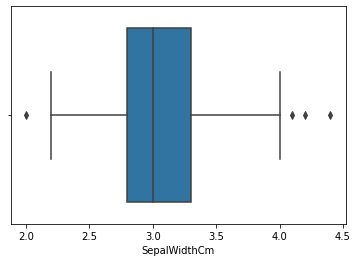

In [21]:
# Boxplot
sns.boxplot(df['SepalWidthCm'])

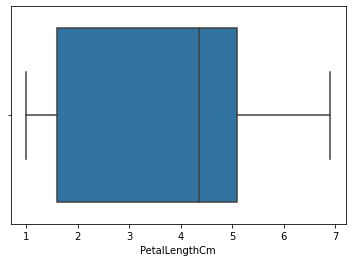

In [22]:
sns.boxplot(df['PetalLengthCm'])

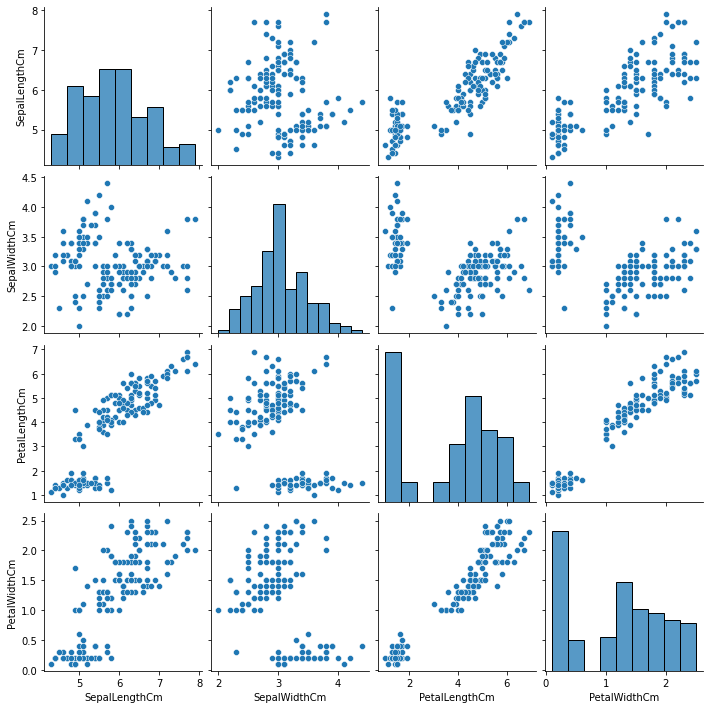

In [33]:
# Pairplot
sns.pairplot(df)

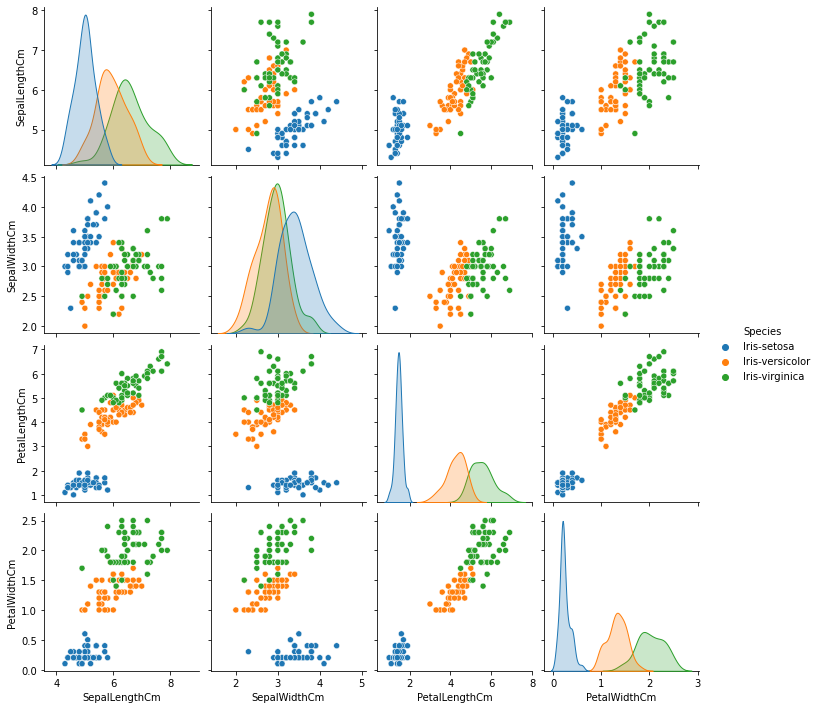

In [34]:
# Pairplot w.r.t Species
sns.pairplot(df, hue = 'Species')

##**Preprocessing**
###***Correlation***

**Predictor Variable ⟶ Species**

**Species ⟶ Object** 

So, we have to convert Species object to numbered categorical data. 

In [36]:
# Correlation with Species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [45]:
corr = df.corr()
corr

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,0.871754,0.817954,0.782561
PetalLengthCm,0.871754,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,0.962757,1.000000,0.956464
Species,0.782561,0.949043,0.956464,1.000000


In [46]:
corr[['Species']]

,Species
SepalLengthCm,0.782561
PetalLengthCm,0.949043
PetalWidthCm,0.956464
Species,1.000000


In [40]:
# SepalWidthCm has negative correlation with Species and 
# except SepalWidthCm we've enough(four other) data for machine learning model
# So, We will drop 'SepalWidthCm'
df.drop('SepalWidthCm', axis = 1, inplace = True)

In [41]:
# SepalWidthCm is dropped from Iris Dataset

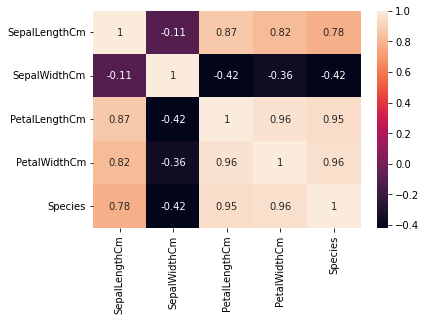

In [44]:
# Plot heatmap of correlation w.r.t 'Species'
sns.heatmap(corr, annot = True)

From the above graph we can see that ⟶
* PetalWidthCm and PetalLengthCm have high correlations.
* PetalLengthC and SepalWidthCm have good coorelations.
* PetalWidthCm and SepalLength have good correlations.



**Heatmap without SepalWidthCm**

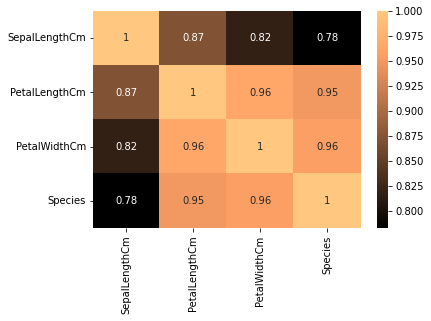

In [84]:
# Heatmap without SepalWidthCm
sns.heatmap(corr, annot =True,cmap = 'copper')  
# cmap = Westia, inferno, icefire, hot, gnuplot, flare, coolwarm, copper, autumn, bone, binary, bwr, cividis

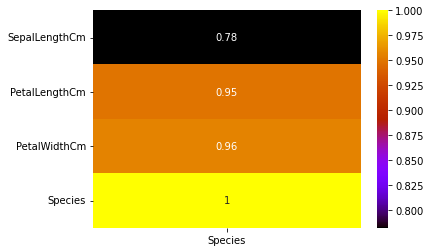

In [82]:
# Correlation with Species
sns.heatmap(corr[['Species']], annot =True,cmap = 'gnuplot')  

####**Define the Independent Variable**
**Note : We don't keep the dependent variable in independent (target) variable.**

In [116]:
# Define the independent variable
x = df.drop('Species', axis = 1)
# We donm't keep dependent variable in independent (target) variable
x.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


####**Define the Dependent (Target) Variable**

In [117]:
y = df[['Species']]    # Take as 2-D or DataFrame
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


####**Train Test Split in 80:20 ratio**

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [90]:
x_train.shape, x_test.shape

((120, 3), (30, 3))

In [91]:
y_train.shape, y_test.shape

((120, 1), (30, 1))

###**Second Machine Learning Algorithm**

In [93]:
from sklearn.neighbors import KNeighborsClassifier

**Created the object of the class of the model KNN.**

**n_neighbors is the value of K.**

In [94]:
model = KNeighborsClassifier(n_neighbors = 3)

####**Train the data**

In [96]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

###**Accuracy**

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)               # R2_Score
# Accuracy
accuracy_score(y_test, y_pred) * 100


100.0

####**Another method to find accuracy**


In [108]:
r2 = model.score(x_test, y_test)
r2 * 100

100.0